## Классификационное дерево  
[Теория sklearn](https://scikit-learn.org/stable/modules/tree.html)

Датасет: Препарат который был назначен пациенту

In [111]:
# Блок с используемыми библиотеками
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

!pip install pydotplus

import numpy as np


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [112]:
df = pd.read_csv('resources/decision_tree.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [114]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


/var/folders/9v/32163wpn1jj2smgt2nq8ypn00000gn/T/ipykernel_61345/1663813180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='viridis')
/var/folders/9v/32163wpn1jj2smgt2nq8ypn00000gn/T/ipykernel_61345/1663813180.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP', data=df, palette='viridis')
/var/folders/9v/32163wpn1jj2smgt2nq8ypn00000gn/T/ipykernel_61345/1663813180.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cholesterol', data=df, palette='viridis')
/var/folders/9v/32163wpn1jj2smgt2nq8yp

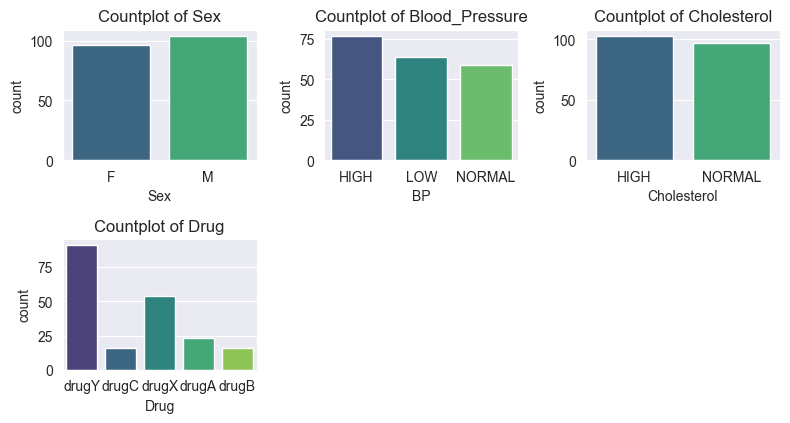

In [116]:
plt.figure(figsize=(8, 6))

plt.subplot(3, 3, 1)
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Countplot of Sex')

plt.subplot(3, 3, 2)
sns.countplot(x='BP', data=df, palette='viridis')
plt.title('Countplot of Blood_Pressure')

plt.subplot(3, 3, 3)  # Corrected subplot position
sns.countplot(x='Cholesterol', data=df, palette='viridis')
plt.title('Countplot of Cholesterol')

plt.subplot(3, 3, 4)
sns.countplot(x='Drug', data=df, palette='viridis')
plt.title('Countplot of Drug')

plt.tight_layout()
plt.show()

In [117]:
transform = df
le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_cholesterol = LabelEncoder()
transform['Sex'] = le_sex.fit_transform(transform['Sex'])
transform['BP'] = le_BP.fit_transform(transform['BP'])
transform['Cholesterol'] = le_cholesterol.fit_transform(transform['Cholesterol'])
transform['Drug'] = le_cholesterol.fit_transform(transform['Drug'])
transform.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [118]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_cholesterol = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'])
X['BP'] = le_BP.fit_transform(X['BP'])
X['Cholesterol'] = le_cholesterol.fit_transform(X['Cholesterol'])
X['Cholesterol'] = le_cholesterol.fit_transform(X['Cholesterol'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

TypeError: can only concatenate str (not "numpy.int64") to str

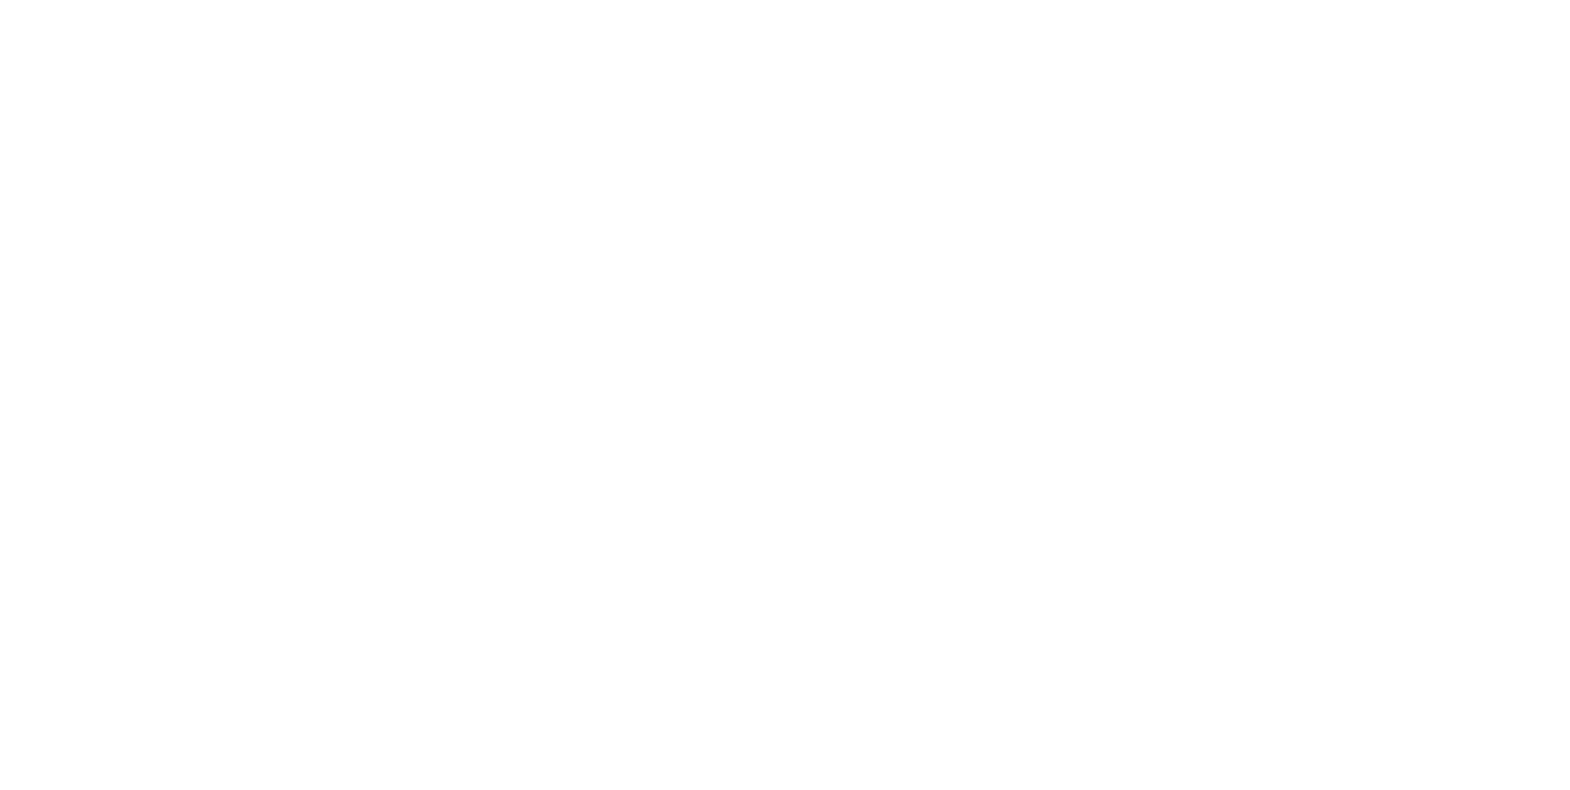

In [121]:
from sklearn.tree import plot_tree

unique_classes = np.unique(y_train)
plt.figure(figsize=(20, 10))
plot_tree(dt, class_names=unique_classes, filled=True)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [ ]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

In [ ]:
print(classification_report(y_test, y_pred))